In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

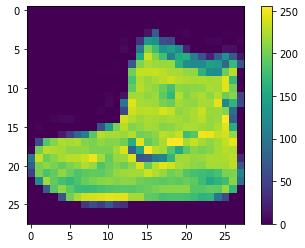

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [23]:
'''
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
'''
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape=(28, 28)))
modelo.add(keras.layers.Dense(256, activation=tensorflow.nn.relu))
modelo.add(keras.layers.Dropout(0.2))
modelo.add(keras.layers.Dense(10, activation=tensorflow.nn.softmax))

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 4s 37ms/step - loss: 0.6570 - accuracy: 0.7708 - val_loss: 0.4479 - val_accuracy: 0.8466
Epoch 2/5
100/100 [==============================] - 1s 5ms/step - loss: 0.4395 - accuracy: 0.8455 - val_loss: 0.4098 - val_accuracy: 0.8517
Epoch 3/5
100/100 [==============================] - 0s 5ms/step - loss: 0.3918 - accuracy: 0.8599 - val_loss: 0.3806 - val_accuracy: 0.8650
Epoch 4/5
100/100 [==============================] - 0s 5ms/step - loss: 0.3616 - accuracy: 0.8708 - val_loss: 0.3574 - val_accuracy: 0.8722
Epoch 5/5
100/100 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8771 - val_loss: 0.3406 - val_accuracy: 0.8764


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.01593192, -0.0044301 ,  0.11271746, ..., -0.00731789,
         0.01289009,  0.02671953],
       [-0.04684549,  0.00174766,  0.00138339, ...,  0.15513174,
         0.00449898, -0.04388044],
       [ 0.06050025, -0.22150917,  0.10787048, ...,  0.08605242,
         0.08540389, -0.07770816],
       ...,
       [-0.07372792, -0.00345553,  0.05202617, ..., -0.00757772,
         0.0484534 ,  0.04964349],
       [ 0.02117362,  0.014618  ,  0.01910472, ...,  0.01026585,
        -0.01044672, -0.08051527],
       [ 0.01923348,  0.05011455,  0.00411551, ...,  0.06217845,
        -0.09615059,  0.07760268]], dtype=float32)

In [9]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [10]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()


[array([[0.87294346, 0.7205026 , 0.79605556, ..., 0.57428193, 0.35584494,
         0.1379289 ],
        [0.5890903 , 0.6737479 , 0.17597461, ..., 0.10444924, 0.86146224,
         0.5136328 ],
        [0.09867223, 0.68296516, 0.49587867, ..., 0.86205554, 0.06602506,
         0.68884075],
        ...,
        [0.20077509, 0.17331651, 0.6420136 , ..., 0.94608426, 0.7667456 ,
         0.62036896],
        [0.8540779 , 0.10923059, 0.0649395 , ..., 0.32806113, 0.49737692,
         0.16628776],
        [0.21480818, 0.46871245, 0.78681254, ..., 0.36929992, 0.43252915,
         0.30736285]], dtype=float32),
 array([-0.0174147 ,  0.14070526,  0.1724096 , -0.01892927,  0.06938812,
         0.13642798, -0.13461293,  0.10295968,  0.06215994,  0.02589107,
        -0.17625579,  0.15802978,  0.02325771,  0.09373098, -0.01041438,
        -0.01839141,  0.2558651 , -0.07528743,  0.05299827,  0.17721063,
        -0.07726799, -0.07043689, -0.05452017,  0.03299652, -0.129388  ,
        -0.0838875 ,  0.10572

In [11]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 71.7465 - accuracy: 0.4148 - val_loss: 10.4198 - val_accuracy: 0.7045
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 18.6892 - accuracy: 0.6267 - val_loss: 5.6579 - val_accuracy: 0.7502
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 7.9695 - accuracy: 0.6805 - val_loss: 3.6183 - val_accuracy: 0.7049
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 4.0285 - accuracy: 0.7091 - val_loss: 2.2369 - val_accuracy: 0.7367
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.1907 - accuracy: 0.7408 - val_loss: 1.5615 - val_accuracy: 0.7601


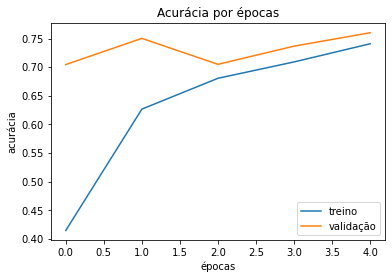

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


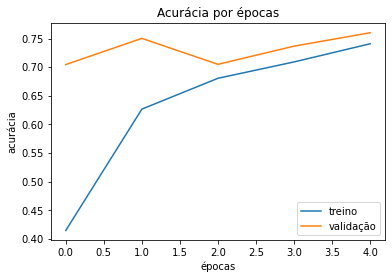

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [14]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

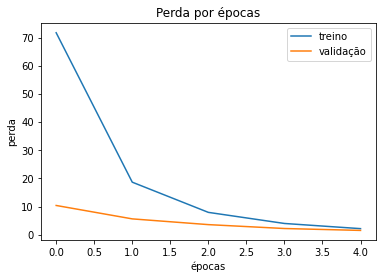

In [15]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [16]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [17]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [18]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

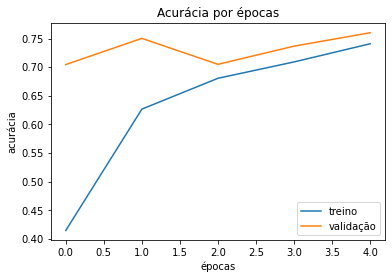

In [19]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

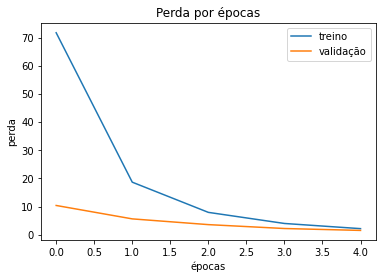

In [20]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [21]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 8
número da imagem de teste: 2
resultado teste modelo salvo: 8
número da imagem de teste: 2


Avaliando o modelo

In [22]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 22063.1133 - accuracy: 0.1000
Perda do teste: 22063.11328125
Acurácia do teste: 0.10000000149011612
